In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tập dữ liệu Life Expectancy Data được nhóm tìm trên Kaggle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KHMT0118/Phân tích dữ liệu lớn/Báo cáo/Life_Expectancy_Data.csv')

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# Tìm sự tương quan giữa các feature
corr = df.corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


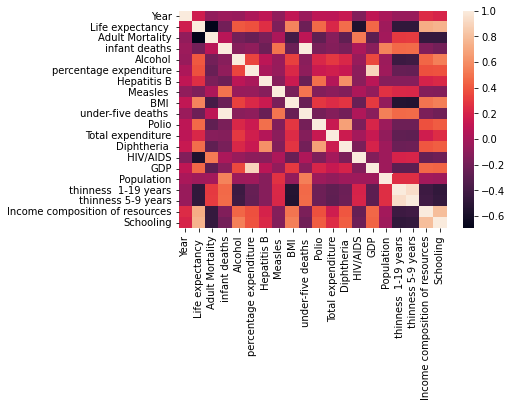

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Hai feature có sự tương quan cao là GDP và Percentage expenditure

Giá trị độ tương quan là 0.899373



In [8]:
GDP = df['GDP']
percentage_expenditure = df['percentage expenditure']

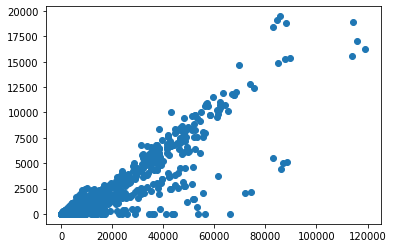

In [9]:
plt.scatter(GDP, percentage_expenditure)
plt.show()

In [10]:
# Xử lý giá trị bị thiếu
GDP[GDP.isna()]

160    NaN
161    NaN
162    NaN
163    NaN
164    NaN
        ..
2901   NaN
2902   NaN
2903   NaN
2904   NaN
2905   NaN
Name: GDP, Length: 448, dtype: float64

In [11]:
GDP = GDP.fillna(df['GDP'].mean())

In [12]:
GDP[GDP.isna()]

Series([], Name: GDP, dtype: float64)

In [13]:
# Xử lý giá trị bằng 0
percentage_expenditure[percentage_expenditure == 0].count()

611

In [14]:
# Thay the cac gia tri 0 o cot percentage_expenditure bang gia tri trung binh cua cot

for i in percentage_expenditure.index:
  if percentage_expenditure[i] == 0:
        percentage_expenditure[i] = percentage_expenditure.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
percentage_expenditure

0        71.279624
1        73.523582
2        73.219243
3        78.184215
4         7.097109
           ...    
2933    907.335193
2934    907.644021
2935    907.952953
2936    908.261991
2937    908.571134
Name: percentage expenditure, Length: 2938, dtype: float64

In [16]:
percentage_expenditure[percentage_expenditure == 0].count()

0

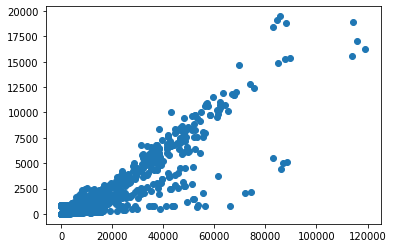

In [17]:
plt.scatter(GDP, percentage_expenditure)
plt.show()

In [18]:
x = GDP.values.reshape(-1, 1)
y = percentage_expenditure.values.reshape(-1, 1)

In [19]:
one = np.ones((x.shape[0], 1))
X = np.concatenate((one, x), axis = 1)

Áp dụng công thức

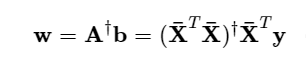

In [20]:
A = np.dot(X.T, X)
b = np.dot(X.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-95.33175028]
 [  0.13419629]]


In [21]:
w_0 = w[0][0]
w_1 = w[1][0]
print('w0 = ', w_0)
print('w1 = ', w_1)

w0 =  -95.33175027924835
w1 =  0.1341962938247886


In [22]:
# y = b + ax
y_pred = w_0 + w_1*x

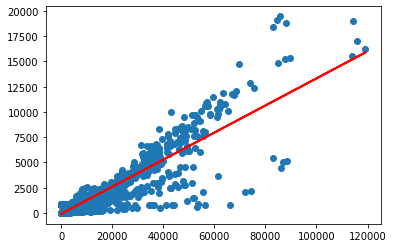

In [23]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
# Câu hỏi: cho Percentage expenditure bằng 70, tìm GDP
# y = a + bx
x_test = (70 + 95.33175027924847) / 0.1341962938247886
print("Percentage expenditure la 70, GPD bang {0}".format(x_test))

Percentage expenditure la 70, GPD bang 1232.014279731983


Linear regression sử dụng thư viện sklearn

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression()

In [33]:
y_predicted = linReg.predict(x_test)

In [34]:
x_test.shape

(588, 1)

In [43]:
print(linReg.intercept_)
print(linReg.coef_)

[-90.72168144]
[[0.13222174]]


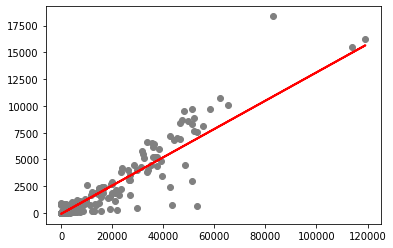

In [35]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_predicted, color='red', linewidth=2)
plt.show()

In [38]:
# Độ chính xác của model
print(linReg.score(x_test, y_test))

0.8720641043660475
